In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Load the data
df = pd.read_csv('wine.csv')
# Separate the chemical properties from the labels
X = df.iloc[:, :-2].values  # Chemical properties
y_color = df['color'].values  # Red/White wine
y_quality = df['quality'].values  # Quality score

In [16]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Below code does the dimensionality reduction using PCA and does k-means clustering on top of it**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


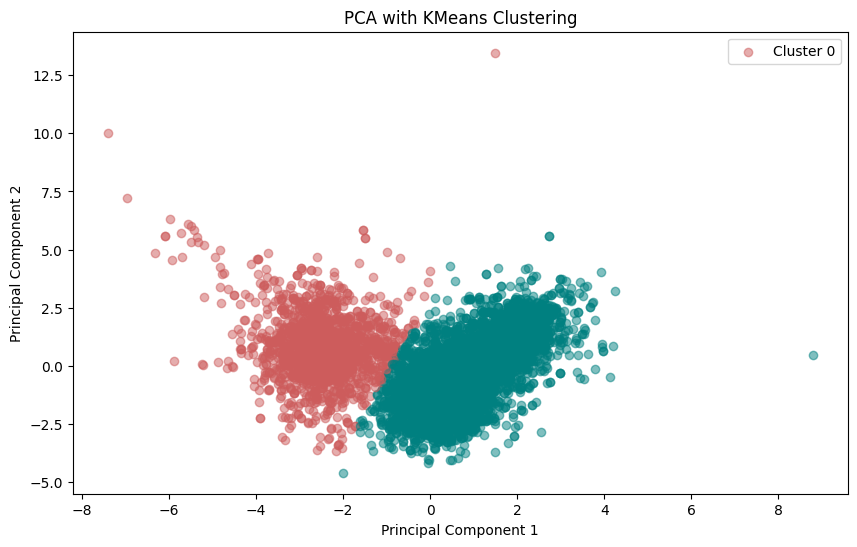

In [17]:
### PCA ###
# Perform PCA to reduce the dimensionality
pca = PCA(n_components=2)
# (I used 2 dimensions primarily to enable easy visualization and comparison of
# the unsupervised techniques)
X_pca = pca.fit_transform(X_scaled)
# KMeans clustering on PCA-reduced data
pca_kmeans = KMeans(n_clusters=2, random_state=42)
pca_clusters = pca_kmeans.fit_predict(X_pca)

# Plot the PCA result with KMeans clusters
plt.figure(figsize=(10, 6))
cluster_colors = {0: 'indianred', 1: 'teal'}
for i in range(X_pca.shape[0]):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], color=cluster_colors[pca_clusters[i]], alpha=0.5, label=f'Cluster {pca_clusters[i]}' if i == 0 else "")
plt.title('PCA with KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper right')

PCA Adjusted Rand Index: 0.9284
PCA Cluster Purity: 0.9829


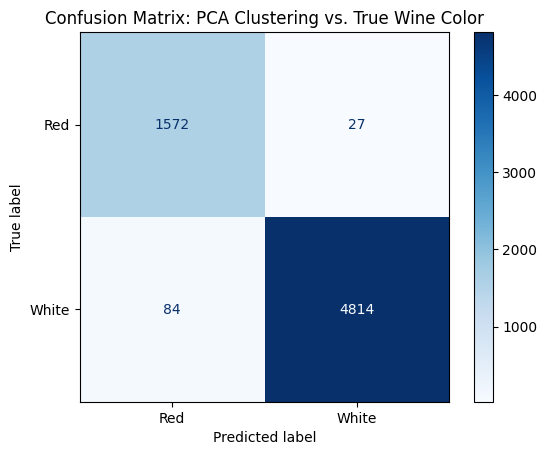

In [35]:
from sklearn.metrics import adjusted_rand_score, confusion_matrix
# Compute ARI for PCA clustering
pca_ari = adjusted_rand_score(y_color, pca_clusters)
print(f"PCA Adjusted Rand Index: {pca_ari:.4f}")
# Convert string labels to integers
color_map = {'red': 0, 'white': 1}
y_color_int = np.array([color_map[color] for color in y_color])

# Compute Cluster Purity for PCA clustering
def cluster_purity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return np.sum(np.amax(cm, axis=0)) / np.sum(cm)

pca_purity = cluster_purity(y_color_int, pca_clusters)
print(f"PCA Cluster Purity: {pca_purity:.4f}")
# Compute the confusion matrix for PCA clustering
cm = confusion_matrix(y_color_int, pca_clusters)

# Plot the confusion matrix with appropriate labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Red', 'White'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: PCA Clustering vs. True Wine Color')
plt.show()

After running the k-means clustering model after performing PCA dimensionality reduction the Rand Index is 0.9284 and the cluster purity is 0.9829

# **Below code does the dimensionality reduction using t-SNE and does k-means clustering on top of it**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 't-SNE Component 2')

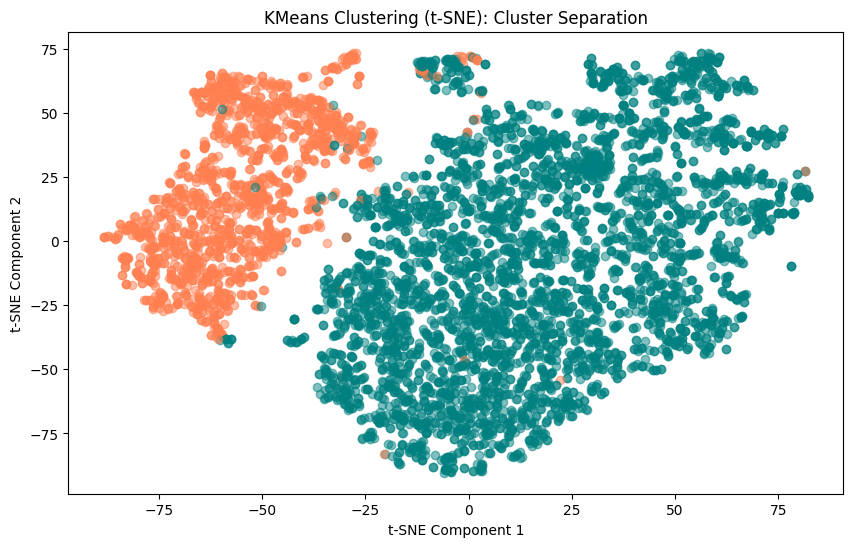

In [21]:
### t-SNE ###
# Perform t-SNE for non-linear dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Plot the KMeans result, color-coded by clusters
plt.figure(figsize=(10, 6))
cluster_colors = {0: 'teal', 1: 'coral'}
for i in range(X_tsne.shape[0]):
    plt.scatter(X_tsne[i, 0], X_tsne[i, 1], color=cluster_colors[clusters[i]], alpha=0.5)
plt.title('KMeans Clustering (t-SNE): Cluster Separation')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

t-SNE Adjusted Rand Index: 0.9410
t-SNE Cluster Purity: 0.9860


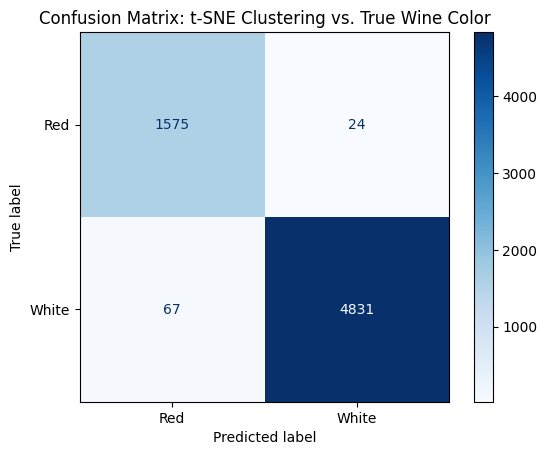

In [29]:
from sklearn.metrics import adjusted_rand_score, confusion_matrix
# Compute ARI for t-SNE clustering
tsne_ari = adjusted_rand_score(y_color, clusters)
print(f"t-SNE Adjusted Rand Index: {tsne_ari:.4f}")
# Convert string labels to integers
color_map = {'red': 0, 'white': 1}
y_color_int = np.array([color_map[color] for color in y_color])

# Compute Cluster Purity for tsne clustering
def cluster_purity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return np.sum(np.amax(cm, axis=0)) / np.sum(cm)

tsne_purity = cluster_purity(y_color_int, clusters)
print(f"t-SNE Cluster Purity: {tsne_purity:.4f}")
# Compute and plot confusion matrix
cm = confusion_matrix(y_color_int, clusters)

# Since the clusters may be mislabeled, correct the labels
# Assuming that cluster 0 was mistakenly labeled as 1, and cluster 1 as 0
# Swap the cluster labels if needed
if cm[0, 0] < cm[0, 1]:
    clusters = 1 - clusters
    cm = confusion_matrix(y_color_int, clusters)  # Recompute confusion matrix with swapped labels

# Plot confusion matrix with correct labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Red', 'White'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: t-SNE Clustering vs. True Wine Color')
plt.show()

After running the k-means clustering model after performing t-SNE dimensionality reduction the Rand Index is 0.941 and the cluster purity is 0.986

# **Trying to predict the wine quality using our winner reduction technique(t-SNE)**

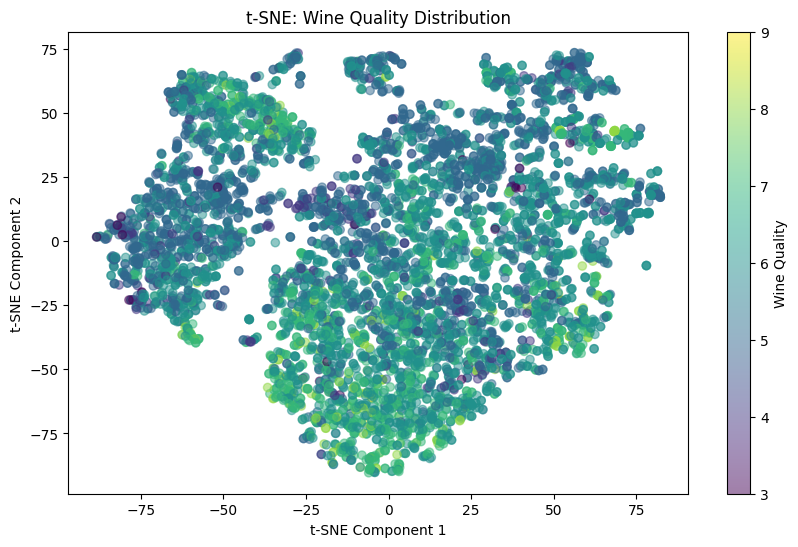

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_quality, cmap='viridis', alpha=0.5)
plt.title('t-SNE: Wine Quality Distribution')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Wine Quality')
plt.show()

In [24]:
# Assume we use a threshold to split wines into 'lower' and 'higher' quality categories
threshold = 6  # Define a threshold to differentiate lower from higher quality wines

y_quality_bin = np.where(y_quality >= threshold, 1, 0)  # 1 for higher quality, 0 for lower quality

# Compute ARI for clustering by quality
quality_ari = adjusted_rand_score(y_quality_bin, pca_clusters)
print(f"PCA Adjusted Rand Index by Quality: {quality_ari:.4f}")

# Compute Cluster Purity for quality-based clustering
quality_purity = cluster_purity(y_quality_bin, pca_clusters)
print(f"PCA Cluster Purity by Quality: {quality_purity:.4f}")

PCA Adjusted Rand Index by Quality: 0.0428
PCA Cluster Purity by Quality: 0.6331


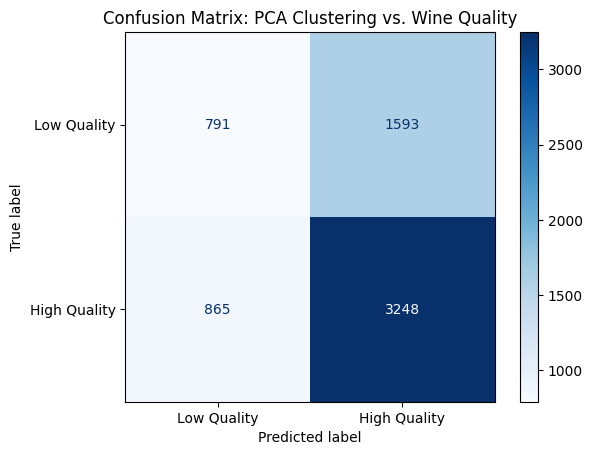

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Binarize wine quality: Assume wines with quality >= 6 are high quality (1), otherwise low quality (0)
threshold = 6
y_quality_bin = np.where(y_quality >= threshold, 1, 0)  # Binary quality labels

# Get confusion matrix comparing the clusters (pca_clusters) with binarized quality labels
cm = confusion_matrix(y_quality_bin, pca_clusters)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Quality', 'High Quality'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: PCA Clustering vs. Wine Quality')
plt.show()

We see that the wine quality prediction done after t-SNE dimensionality reduction and performing k-means clustering we get 63 percent node purity and even the Rand index is 0.0428, which suggests that the model is able to cluster wine quality however with lower accuracy